In [1]:
import numpy as np
import hapke
import matplotlib.pyplot as plt
from scipy import optimize
import os
import shutil
from pyvims import VIMS


listo


In [2]:
# DOWNLOAD THE CUBE AND ALLOCATE IT TO THE RIGHT FOLDER

cube_id = '1671591682_1'

directory = 'C:/Users/USUARIO/Desktop/MSc Thesis/Phase A - Data Analysis/Data/'
cube = VIMS(cube_id,root=directory)

origin = directory + cube.fname
destination = directory + cube.target_name + '/' + str(cube.flyby)

# If the folder does not exist, create it

if not os.path.exists(destination):
    os.mkdir(destination)
    print("New folder created")

if os.path.exists(destination + '/' + cube.fname):
    print("Existing Cube")
else:
    shutil.move(origin, destination)

print("Cube saved in: " + destination)


Existing Cube
Cube saved in: C:/Users/USUARIO/Desktop/MSc Thesis/Phase A - Data Analysis/Data/ENCELADUS/E13


In [3]:
data = np.loadtxt('./Optical Constants/Amorphous_120.txt')

# OPTICAL RANGE OF THE VIMS INSTRUMENT

max_wavelength = 5.1
min_wavelength = 0.35

wavelength1 = [row[0] for row in data]
n = [row[1] for row in data]
k = [row[2] for row in data]

indices = [i for i in range(len(wavelength1)) if min_wavelength <= wavelength1[i] <= max_wavelength]


# Extract wavelength, n, and k values within desired range
wavelength_range1 = [wavelength1[i] for i in indices]
n_range = [n[i] for i in indices]
k_range = [k[i] for i in indices]

In [5]:
pixel1 = cube@(36, 15)
e, i, phase = [np.deg2rad(pixel1.eme),np.deg2rad(pixel1.inc),np.deg2rad(pixel1.phase)]

angles = [e,i,phase]

IF1 = pixel1.spectrum
wav1 = pixel1.wvlns

ini_par = [0.30, 0.00001, np.deg2rad(20)]

optimized_parameters = optimize.least_squares(
    hapke.cost_function, ini_par, args=(wavelength_range1, angles, IF1, wav1,n_range,k_range), bounds=([0.0,0.0,0.0], [0.75,0.001,np.deg2rad(45)])
)

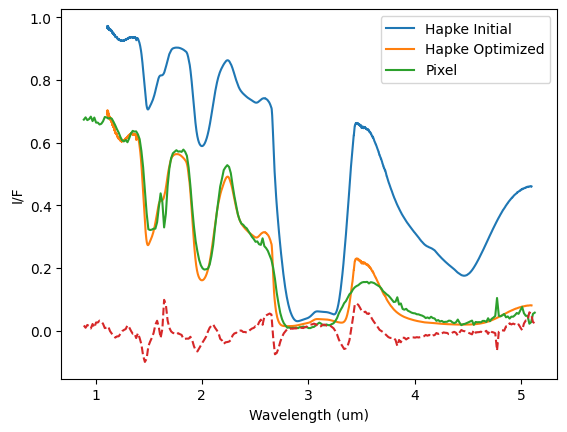

In [6]:
optimized_values = optimized_parameters.x

old_hapke = hapke.hapke_model(ini_par,wavelength_range1, angles, n_range,k_range)['IF']

new_hapke = hapke.hapke_model(optimized_parameters.x,wavelength_range1,angles, n_range,k_range)['IF']

fig, ax = plt.subplots()
ax.plot(wavelength_range1, old_hapke, label = 'Hapke Initial')
ax.plot(wavelength_range1, new_hapke, label = 'Hapke Optimized')
ax.plot(wav1, IF1, label = 'Pixel')
ax.plot(wav1, optimized_parameters.fun, ls = '--')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [7]:
optimized_values = optimized_parameters.x

# Retrieve the covariance matrix
cov_matrix = np.linalg.inv(optimized_parameters.jac.T @ optimized_parameters.jac)

# Calculate the standard errors of the optimized parameters
parameter_errors = np.sqrt(np.diag(cov_matrix))

# Print the optimized parameter values and their errors
for i, value in enumerate(optimized_values):
    print(f"Parameter {i+1}: {value:} +/- {parameter_errors[i]:.4f}")

# Calculate correlation matrix
correlation_matrix = cov_matrix / np.outer(parameter_errors, parameter_errors)

print("Correlation matrix:")
print(correlation_matrix)

Parameter 1: 0.026863929796901564 +/- 0.9948
Parameter 2: 6.33610131413415e-05 +/- 0.0002
Parameter 3: 0.20107291042887002 +/- 4.2810
Correlation matrix:
[[1.         0.97149464 0.99082624]
 [0.97149464 1.         0.94951916]
 [0.99082624 0.94951916 1.        ]]


In [ ]:
plt.figure(figsize=(12, 8))

plt.imshow(cube@2.03, extent=cube.extent, cmap='gray', vmin=0, vmax=.18)

plt.colorbar(extend='max', label='I/F')

plt.scatter(36, 15, s=150)
plt.scatter(27, 30, s=150)

plt.xlabel(cube.slabel)
plt.ylabel(cube.llabel)

plt.xticks(cube.sticks)
plt.yticks(cube.lticks);

In [ ]:
pixel1 = cube@(27, 30)

i = np.deg2rad(pixel1.inc)
e = np.deg2rad(pixel1.eme)
g = np.deg2rad(pixel1.phase)

print(pixel1.inc,pixel1.eme,pixel1.phase)

IF1 = pixel1.spectrum
wav1 = pixel1.wvlns

gamma = np.arctan((np.cos(i))/(np.cos(e)*np.sin(g)) - 1 / np.tan(g))
beta = np.cos(e)/np.cos(gamma)

disk_f = np.cos(g/2)*np.cos((np.pi/(np.pi-g))*(gamma-g/2))*beta**(g/(np.pi-g))/np.cos(gamma)
albedo = IF1/(disk_f*(1-0.3651*g))



ini_par = [0.30, 0.00001, np.deg2rad(20)]

optimized_parameters = optimize.least_squares(
    cost_function, ini_par, args=(wavelength_range1, e, i, g, IF1, wav1), bounds=([0.0,0.0,0.0], [0.75,0.0001,np.deg2rad(45)])
)

In [ ]:
print(optimized_parameters)
optimized_values = optimized_parameters.x
new_hapke = hapke_model(optimized_parameters.x,wavelength_range1,e,i,g)

fig, ax = plt.subplots()
ax.plot(wavelength_range1, hapke_model(ini_par,wavelength_range1,e,i,g), label = 'Hapke Initial')
ax.plot(wavelength_range1, new_hapke, label = 'Hapke Optimized')
ax.plot(wav1, IF1, label = 'Pixel')
ax.plot(wav1, optimized_parameters.fun, ls = '--')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
optimized_values = optimized_parameters.x

# Retrieve the covariance matrix
cov_matrix = np.linalg.inv(optimized_parameters.jac.T @ optimized_parameters.jac)

# Calculate the standard errors of the optimized parameters
parameter_errors = np.sqrt(np.diag(cov_matrix))

# Print the optimized parameter values and their errors
for i, value in enumerate(optimized_values):
    print(f"Parameter {i+1}: {value:} +/- {parameter_errors[i]:.4f}")

correlation_matrix = cov_matrix / np.outer(parameter_errors, parameter_errors)

print("Correlation matrix:")
print(correlation_matrix)